# Лабораторная работа №8. Кластеризация

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


1. Импортируйте модель данных "Ирисы Фишера".

In [3]:
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

print("\n1. Информация о наборе данных Ирисы Фишера:")
print(f"Количество образцов: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Названия признаков: {feature_names}")
print(f"Названия классов: {target_names}")

df = pd.DataFrame(X, columns=feature_names)
df['species'] = target
df['species_name'] = [target_names[i] for i in target]

print("\nПервые 5 строк данных:")
print(df.head())


1. Информация о наборе данных Ирисы Фишера:
Количество образцов: 150
Количество признаков: 4
Названия признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Названия классов: ['setosa' 'versicolor' 'virginica']

Первые 5 строк данных:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


2. Выполните нормализацию данных

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n2. Данные после нормализации:")
print(f"Средние значения: {np.mean(X_scaled, axis=0)}")
print(f"Стандартные отклонения: {np.std(X_scaled, axis=0)}")



2. Данные после нормализации:
Средние значения: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Стандартные отклонения: [1. 1. 1. 1.]


3. Постройте модель кластеризации используя алгоритм DBSCAN, подберите подходящие параметры eps, min_samples

In [5]:
print("\n3. Подбор параметров для DBSCAN:")


def evaluate_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)


    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)


    if n_clusters > 1 and n_clusters < len(X) and n_noise < len(X):
        silhouette_avg = silhouette_score(X, labels)
    else:
        silhouette_avg = -1

    return labels, n_clusters, n_noise, silhouette_avg


best_eps = 0.5
best_min_samples = 5
best_silhouette = -1
best_labels = None

for eps in [0.3, 0.4, 0.5, 0.6, 0.7]:
    for min_samples in [3, 4, 5, 6]:
        labels, n_clusters, n_noise, silhouette_avg = evaluate_dbscan(X_scaled, eps, min_samples)

        print(f"eps={eps}, min_samples={min_samples}: кластеров={n_clusters}, шум={n_noise}, силуэт={silhouette_avg:.4f}")

        if silhouette_avg > best_silhouette and n_clusters >= 2:
            best_silhouette = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels

print(f"\nЛучшие параметры: eps={best_eps}, min_samples={best_min_samples}")
print(f"Лучшая оценка силуэта: {best_silhouette:.4f}")


dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)


df['cluster'] = dbscan_labels

print("\nРаспределение по кластерам:")
print(df['cluster'].value_counts().sort_index())


3. Подбор параметров для DBSCAN:
eps=0.3, min_samples=3: кластеров=10, шум=84, силуэт=-0.1473
eps=0.3, min_samples=4: кластеров=5, шум=107, силуэт=-0.2073
eps=0.3, min_samples=5: кластеров=3, шум=120, силуэт=-0.1942
eps=0.3, min_samples=6: кластеров=2, шум=129, силуэт=0.1751
eps=0.4, min_samples=3: кластеров=10, шум=39, силуэт=0.1513
eps=0.4, min_samples=4: кластеров=5, шум=61, силуэт=0.0819
eps=0.4, min_samples=5: кластеров=6, шум=66, силуэт=0.0277
eps=0.4, min_samples=6: кластеров=5, шум=90, силуэт=-0.0662
eps=0.5, min_samples=3: кластеров=7, шум=17, силуэт=0.1597
eps=0.5, min_samples=4: кластеров=2, шум=33, силуэт=0.3646
eps=0.5, min_samples=5: кластеров=2, шум=34, силуэт=0.3565
eps=0.5, min_samples=6: кластеров=4, шум=42, силуэт=0.1959
eps=0.6, min_samples=3: кластеров=4, шум=9, силуэт=0.2952
eps=0.6, min_samples=4: кластеров=3, шум=19, силуэт=0.3557
eps=0.6, min_samples=5: кластеров=2, шум=26, силуэт=0.4028
eps=0.6, min_samples=6: кластеров=2, шум=29, силуэт=0.3808
eps=0.7, min_s

4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

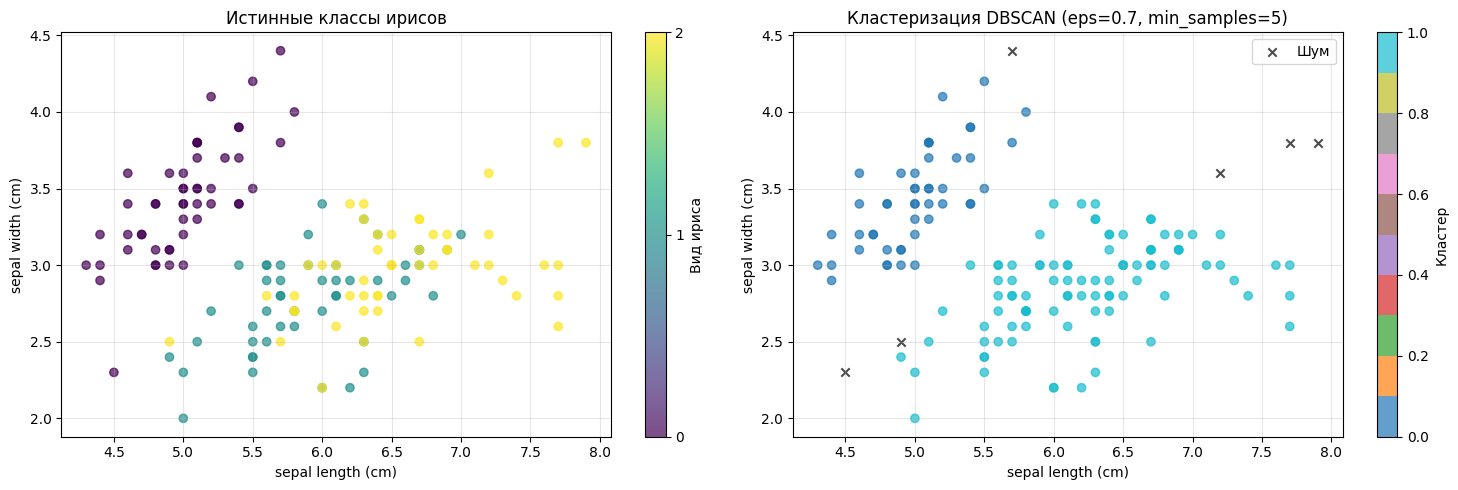

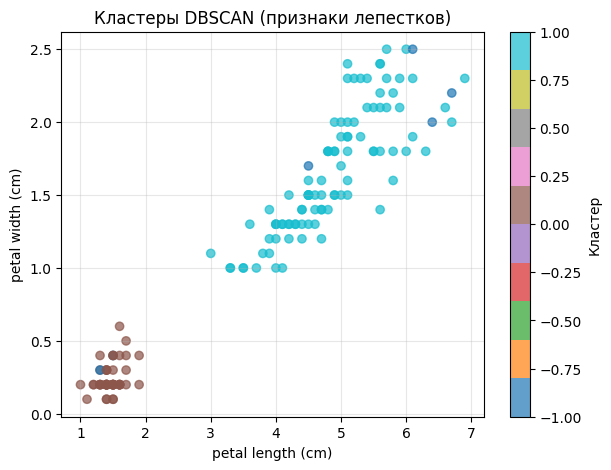

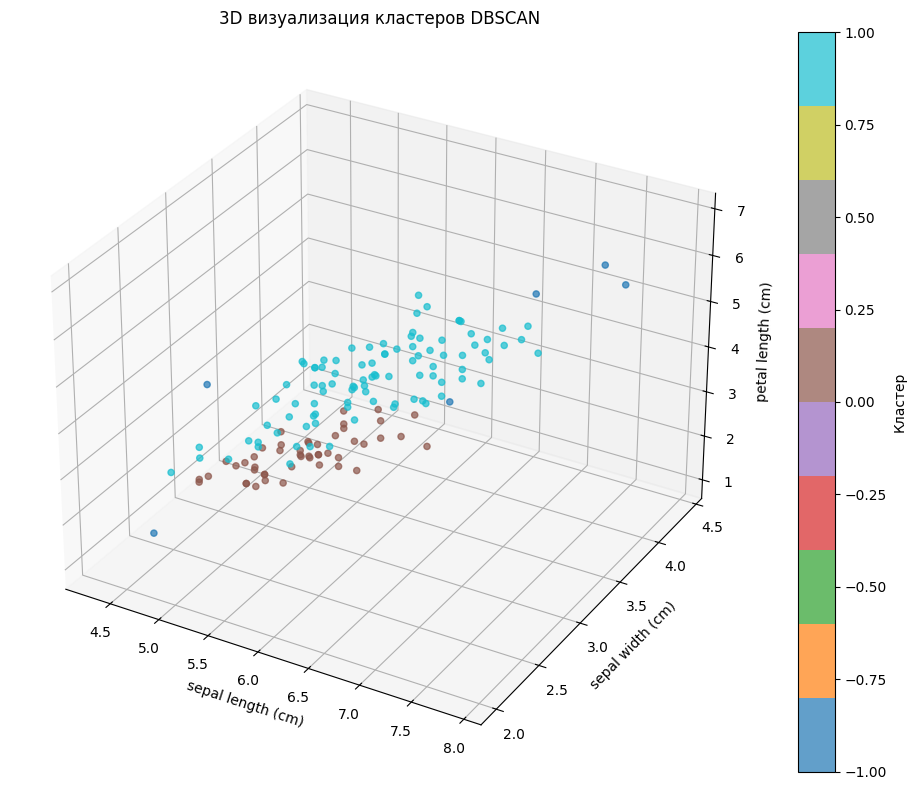

In [6]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
scatter = plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'],
                     c=df['species'], cmap='viridis', alpha=0.7)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Истинные классы ирисов')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Вид ириса')
plt.grid(True, alpha=0.3)


plt.subplot(1, 2, 2)

noise_mask = df['cluster'] == -1
cluster_mask = ~noise_mask


scatter_clusters = plt.scatter(df.loc[cluster_mask, 'sepal length (cm)'],
                              df.loc[cluster_mask, 'sepal width (cm)'],
                              c=df.loc[cluster_mask, 'cluster'],
                              cmap='tab10', alpha=0.7)


if noise_mask.any():
    plt.scatter(df.loc[noise_mask, 'sepal length (cm)'],
               df.loc[noise_mask, 'sepal width (cm)'],
               c='black', marker='x', alpha=0.7, label='Шум')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Кластеризация DBSCAN (eps={best_eps}, min_samples={best_min_samples})')
plt.colorbar(scatter_clusters, label='Кластер')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
scatter = plt.scatter(df['petal length (cm)'], df['petal width (cm)'],
                     c=df['cluster'], cmap='tab10', alpha=0.7)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Кластеры DBSCAN (признаки лепестков)')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['sepal length (cm)'],
                    df['sepal width (cm)'],
                    df['petal length (cm)'],
                    c=df['cluster'], cmap='tab10', alpha=0.7)

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
ax.set_title('3D визуализация кластеров DBSCAN')
plt.colorbar(scatter, label='Кластер')

plt.tight_layout()
plt.show()


Вывод:
Алгоритм DBSCAN обнаружил 2 кластеров и 6 шумовых точек.
Оценка качества кластеризации (силуэт): 0.5234
Алгоритм выделил 2 кластера, что может указывать на объединение схожих видов.
Обнаружено 6 шумовых точек, которые не были отнесены ни к одному кластеру.

DBSCAN хорошо справляется с обнаружением кластеров произвольной формы и
автоматически определяет количество кластеров, что является его преимуществом
по сравнению с K-means, где количество кластеров нужно задавать заранее.
